In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [12]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

ROAD = "Taft Ave."
YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/Thesis Datasets/mmda/"
DATASET_DIVISION = "seasonWet"

In [88]:
TRAFFIC_LIST = []
for t in ROADS_1:
    ROAD = t
    TRAFFIC_FILENAME = "mmda_" + ROAD + "_" + YEAR +  "_" + DATASET_DIVISION

    try:
        traffic_raw_data = pd.read_csv(DATASET_DIR + TRAFFIC_FILENAME + EXT, skipinitialspace=True)
    except FileNotFoundError: 
        print("File not found... file: " + DATASET_DIR + TRAFFIC_FILENAME)
        continue
    
    traffic_raw_data = traffic_raw_data.fillna(0)
    traffic_dataset = traffic_raw_data

    cols_to_remove =  []

    traffic_dataset.drop(traffic_raw_data.columns[[cols_to_remove]], axis=1, inplace=True)
    TRAFFIC_LIST.append(traffic_dataset)
    
    print("File adding to array... file: " + TRAFFIC_FILENAME)

File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_A. Maceda_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Anda Circle_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Antipolo_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Bluementritt_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Buendia_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Edsa Extension_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Finance Road_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Gov. Forbes - Lacson_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Lerma_2015_seasonWet
File not found... file: ../../../../datasets/Thesis Datasets/mmda/mmda_Magsaysay Ave_2015_seasonWet
File not found... f

In [89]:
## Moving Average


w = 2
tempTraffic = TRAFFIC_LIST[0].copy()
tempShift = tempTraffic.shift((w-1))
temp_mean = tempShift.rolling(w).mean()

tempTraffic['rollingN'] = temp_mean.statusN
tempTraffic.index = tempTraffic.dt
print(tempTraffic.round(3).head())

#Plotting Northbound and Rolling Northbound
tempTraffic.iloc[5:]

                              dt  statusN  statusS  rollingN
dt                                                          
01/06/2015 0:00  01/06/2015 0:00    0.908    0.932       NaN
01/06/2015 0:15  01/06/2015 0:15    0.910    0.932       NaN
01/06/2015 0:30  01/06/2015 0:30    0.911    0.931     0.909
01/06/2015 0:45  01/06/2015 0:45    0.912    0.931     0.910
01/06/2015 1:00  01/06/2015 1:00    0.914    0.931     0.912


,dt,statusN,statusS,rollingN
dt,,,,
01/06/2015 1:15,01/06/2015 1:15,0.915199,0.930360,0.912934
01/06/2015 1:30,01/06/2015 1:30,0.916810,0.929995,0.914431
01/06/2015 1:45,01/06/2015 1:45,0.918500,0.929617,0.916004
01/06/2015 2:00,01/06/2015 2:00,0.920268,0.929227,0.917655
01/06/2015 2:15,01/06/2015 2:15,0.922118,0.928829,0.919384
01/06/2015 2:30,01/06/2015 2:30,0.924049,0.928427,0.921193
01/06/2015 2:45,01/06/2015 2:45,0.926063,0.928025,0.923083
01/06/2015 3:00,01/06/2015 3:00,0.928163,0.927625,0.925056
01/06/2015 3:15,01/06/2015 3:15,0.930348,0.927232,0.927113


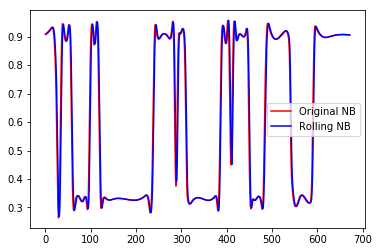

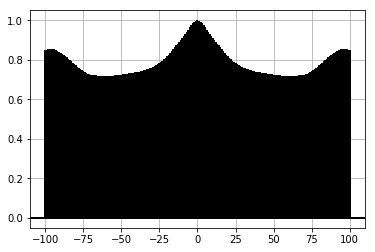

In [58]:
#Auto Correlate Northbound traffic
x = TRAFFIC_LIST[0].statusN

fig, ax = plt.subplots()

ax.acorr(x, usevlines=True, normed=True, maxlags=100, lw=2)
ax.grid(True)
ax.axhline(0, color='black', lw=2)

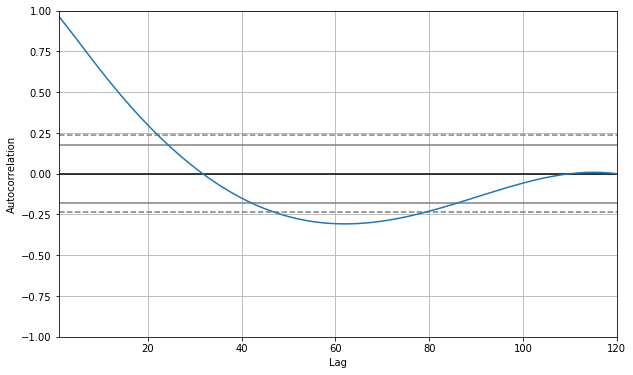

In [29]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(TRAFFIC_LIST[0][:120].statusS);
plt.show()

In [4]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [5]:
lags = 500
ncorr = []
scorr = []

for i in range(0, lags):
    traffic_shifted = df_shifted(traffic, 'statusS-1', lag=-i)
    traffic_shifted = df_shifted(traffic_shifted, 'statusN-1', lag=-i)
    print("Lag: " + str(i))
    south_corr = traffic_shifted.corr().iloc[2, 3]
    north_corr = traffic_shifted.corr().iloc[0, 1]
    print("North: " + str(north_corr))
    print("South: " + str(south_corr))
    print("\n")
    ncorr.append(north_corr)
    scorr.append(south_corr)    

Lag: 0
North: 1.0
South: 1.0


Lag: 1
North: 0.9994381215669809
South: 0.9985416372013319


Lag: 2
North: 0.997754236333581
South: 0.9941760235419762


Lag: 3
North: 0.9949541172562771
South: 0.9869314692969962


Lag: 4
North: 0.9910476983507807
South: 0.976854748253436


Lag: 5
North: 0.9860490093184109
South: 0.9640104955403112


Lag: 6
North: 0.9799760871297023
South: 0.9484804045430355


Lag: 7
North: 0.9728508660515868
South: 0.9303622468438336


Lag: 8
North: 0.9646990476032247
South: 0.9097687391301446


Lag: 9
North: 0.955549951927454
South: 0.8868262810120365


Lag: 10
North: 0.945436352065951
South: 0.861673587676216


Lag: 11
North: 0.9343942926267531
South: 0.8344602411587402


Lag: 12
North: 0.9224628943374065
South: 0.8053451835011697


Lag: 13
North: 0.9096841459804271
South: 0.774495174341731


Lag: 14
North: 0.8961026852121291
South: 0.7420832352113395


Lag: 15
North: 0.8817655697677396
South: 0.7082871027711699


Lag: 16
North: 0.8667220405583681
South: 0.67328771322

Lag: 139
North: 0.10816369010233445
South: -0.21343852710119993


Lag: 140
North: 0.10561922705954437
South: -0.22070796974008958


Lag: 141
North: 0.10337458240308377
South: -0.22677508756639925


Lag: 142
North: 0.10143536952356288
South: -0.23162299123306052


Lag: 143
North: 0.09980594522534283
South: -0.2352392091263726


Lag: 144
North: 0.09848939404196938
South: -0.23761572665508243


Lag: 145
North: 0.09748751896914223
South: -0.23874902215526303


Lag: 146
North: 0.09680083841889595
South: -0.23864009807030692


Lag: 147
North: 0.09642858917609884
South: -0.2372945060662314


Lag: 148
North: 0.09636873512724173
South: -0.23472236474211308


Lag: 149
North: 0.09661798152379023
South: -0.23093836859052014


Lag: 150
North: 0.09717179454789797
South: -0.22596178682724985


Lag: 151
North: 0.09802442595902588
South: -0.21981645062018815


Lag: 152
North: 0.09916894261635359
South: -0.21253072718284663


Lag: 153
North: 0.10059726070584732
South: -0.20413747917847433


Lag: 154
Nor

Lag: 282
North: 0.1749804957494114
South: 0.22611362545598065


Lag: 283
North: 0.175963846553506
South: 0.23143482757914818


Lag: 284
North: 0.17670413624146183
South: 0.23568157472358403


Lag: 285
North: 0.17719765339105195
South: 0.23883644176632857


Lag: 286
North: 0.17744182279846774
South: 0.24088780701710655


Lag: 287
North: 0.1774352120776353
South: 0.2418299116882897


Lag: 288
North: 0.17717753344558365
South: 0.24166287829747524


Lag: 289
North: 0.17666964073246846
South: 0.24039268785908063


Lag: 290
North: 0.1759135216524034
South: 0.23803111643275898


Lag: 291
North: 0.17491228537961045
South: 0.23459563185321566


Lag: 292
North: 0.17367014547556137
South: 0.23010925151506348


Lag: 293
North: 0.17219239821840082
South: 0.2246003620953045


Lag: 294
North: 0.17048539638768476
South: 0.21810250208542659


Lag: 295
North: 0.16855651856747836
South: 0.21065410804728274


Lag: 296
North: 0.1664141340614723
South: 0.20229822607258688


Lag: 297
North: 0.164067563597226

North: 0.015249629471170388
South: -0.19483496595186323


Lag: 425
North: 0.012692530278814127
South: -0.19994623718538712


Lag: 426
North: 0.010388706633514886
South: -0.20416967711205666


Lag: 427
North: 0.008344647239968094
South: -0.20748824476993577


Lag: 428
North: 0.006565851351970777
South: -0.20988820396822755


Lag: 429
North: 0.005056810770759268
South: -0.2113591188417738


Lag: 430
North: 0.0038209957847074997
South: -0.21189384398218455


Lag: 431
North: 0.0028608450567417375
South: -0.21148851037191002


Lag: 432
North: 0.002177759455225071
South: -0.2101425083478036


Lag: 433
North: 0.0017720998094733324
South: -0.20785846881809739


Lag: 434
North: 0.00164318854382805
South: -0.20464224392733274


Lag: 435
North: 0.0017893150919471848
South: -0.20050288799509472


Lag: 436
North: 0.002207744964511468
South: -0.19545263853326367


Lag: 437
North: 0.0028947323396810625
South: -0.18950689654332786


Lag: 438
North: 0.0038455360506938325
South: -0.18268420517032535


L

In [6]:
d = {'S-Corr': scorr, 'N-Corr': ncorr, 'Lag': range(0, lags), }

df = pd.DataFrame(data=d)
df.head()

,Lag,N-Corr,S-Corr
0,0,1.000000,1.000000
1,1,0.999438,0.998542
2,2,0.997754,0.994176
3,3,0.994954,0.986931
4,4,0.991048,0.976855


In [18]:
df.iloc[95, :]

Lag       95.000000
N-Corr     0.286196
S-Corr     0.429613
Name: 95, dtype: float64

In [9]:
df.to_csv("stats/autocorr_" + FILENAME + EXT, encoding='utf-8', index=False)

## Visualize Correlations

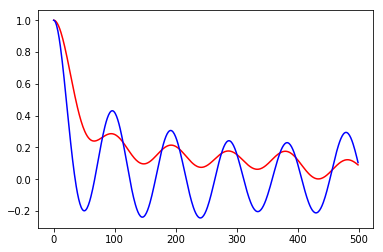

In [8]:
import matplotlib.pyplot as plt
plt.plot(ncorr, color="red")
plt.plot(scorr, color="blue")
plt.show()